In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[Text(0.5, 0, '$\\Delta t$'), Text(0, 0.5, '$r_i^{*}$')]

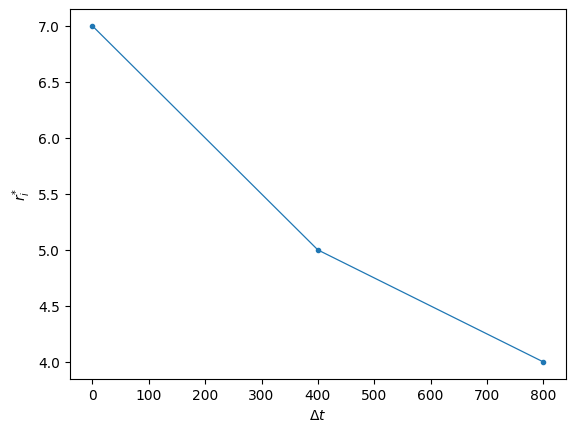

In [2]:
deltat = [0, 400, 800]
mcs_max = [7.0, 5.0, 4.0]

fig, ax = plt.subplots()
ax.plot(deltat, mcs_max, marker='.', lw=0.9)
ax.set(xlabel=r'$\Delta t$', ylabel='$r_i^{*}$')


[Text(0.5, 0, '$\\Delta t$'),
 Text(0, 0.5, '$r_i^{*}(\\Delta t = 0) - r_i^{*}$')]

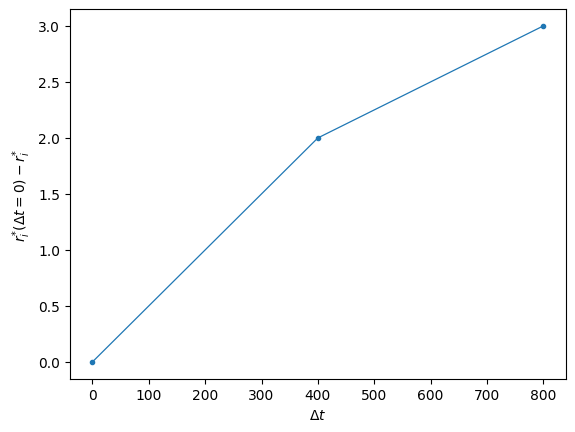

In [3]:
fig, ax = plt.subplots()
mcs_max_norm = mcs_max[0] - np.array(mcs_max)
ax.plot(deltat, mcs_max_norm, lw=0.9, marker='.')
ax.set(xlabel=r'$\Delta t$', ylabel='$r_i^{*}(\Delta t = 0) - r_i^{*}$')


In [7]:
def linFunc(x,a,b):
    return a*x+b

def pLaw(x,a,b):
    return b*x**a

# deltat_offset = np.array(deltat) + 100
paramfit, covfit = curve_fit(linFunc, np.log(np.array(deltat)+100), np.log(np.array(mcs_max_norm)+1.0))
paramfit3, covfit3 = curve_fit(pLaw, deltat, mcs_max_norm)
print(paramfit)
print(paramfit[0], np.exp(paramfit[1]))
print(paramfit3)

[ 0.64187455 -2.94210589]
0.6418745455594331 0.052754516523178155
[0.5849625  0.06010664]


[Text(0.5, 0, '$\\Delta t$'),
 Text(0, 0.5, '$r_i^{*}(\\Delta t = 0) - r_i^{*}$')]

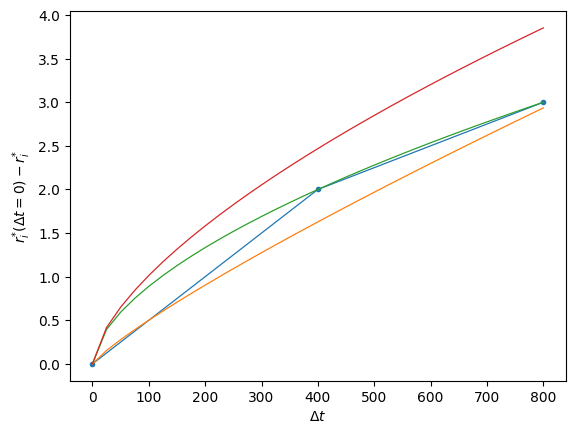

In [8]:
fig, ax = plt.subplots()
ax.plot(deltat, mcs_max_norm, marker='.', lw=0.9)
ax.plot(np.arange(0,825,25), 0.01*np.arange(0,825,25)**0.85, lw=0.9)
ax.plot(np.arange(0,825,25), paramfit3[1]*np.arange(0,825,25)**paramfit3[0], lw=0.9)
ax.plot(np.arange(0,825,25), np.exp(paramfit[1])*np.arange(0,825,25)**paramfit[0], lw=0.9)
ax.set(xlabel=r'$\Delta t$', ylabel='$r_i^{*}(\Delta t = 0) - r_i^{*}$')